### Importowanie bibliotek

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D


### Generowanie zmyślonych danych do trenowanie

In [27]:
observations = 1000000

xs = np.random.uniform(low = -10, high = 10, size=(observations, 1))
zs = np.random.uniform(-10, 10, (observations, 1))

inputs = np.column_stack((xs, zs))

print(inputs.shape)

(1000000, 2)


### Stworzenie docelowych danych (dla modelu liniowego)
np. f(x,z) = 2*x - 3*z + 5 + szum

In [28]:
noise = np.random.uniform(-1,1,(observations,1))

targets = 2*xs - 3*zs + 5 + noise

print(targets.shape)

(1000000, 1)


### Wyrysowanie danych

In [29]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs,zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 432x288 with 1 Axes>

### Tworzenie zmiennych

In [30]:
init_range = 0.1

weights = np.random.uniform(-init_range, init_range, size=(2,1))

biases = np.random.uniform(-init_range, init_range, size=1)

print(weights)
print(biases)

[[ 0.0459676 ]
 [-0.00412877]]
[-0.09855315]


### Ustawienie learning_rate

In [31]:
learning_rate = 0.02

### Trenowanie modelu

In [32]:
for i in range(100):
    outputs = np.dot(inputs, weights) + biases
    deltas = outputs - targets
    
    loss = np.sum(deltas ** 2) / 2 / observations
    
    print(loss)
    
    deltas_scaled = deltas / observations
    
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    
    biases = biases - learning_rate * np.sum(deltas_scaled)

226.43836866342883
36.35606780649285
14.788589476219972
11.971335622550479
11.255071037339508
10.788325481770162
10.364647812666655
9.960480740369466
9.572622477566853
9.200157155783472
8.842445196033616
8.498899028809028
8.168957318479565
7.852081288013836
7.547753532578836
7.255477140621101
6.974774878712076
6.705188411892696
6.446277555250207
6.197619555172364
5.958808399068161
5.729454152424301
5.509182322114081
5.297633244919283
5.094461500266597
4.899335346219569
4.71193617780534
4.531958006791511
4.359106962063908
4.193100809789324
4.033668492579782
3.8805496869058698
3.7334943780365357
3.592262451811154
3.456623302577478
3.3263554566551967
3.2012462107103077
3.0810912844498657
2.9656944870699826
2.854867396912482
2.748429053807127
2.646205663597092
2.548030314365191
2.453742703897548
2.363188877939683
2.276220978817654
2.192697004013778
2.112480574302737
2.035440711069516
1.9614516224454817
1.8903924979135174
1.822147311046743
1.7566046300588043
1.6936574358563365
1.63320294729

### Sprawdzenie czy wagi i biases są poprawne
była funkcja f(x,z) = 2x - 3z + 5 + szum

In [33]:
print(weights, biases)

[[ 2.00021136]
 [-3.00002934]] [4.32376141]


### Narysowanie wejść i docelowych wartości

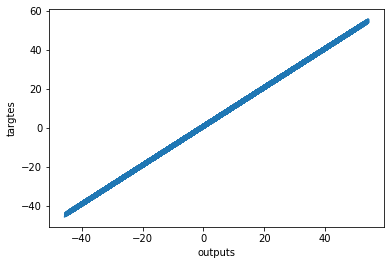

In [35]:
plt.rcParams['agg.path.chunksize'] = 10000

plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targtes')
plt.show()